In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC



# dados_dengue = pd.read_csv('/content/dhaka_dataset_bangladesh.csv')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dhaka_dataset_bangladesh.csv')
df.head()

,Gender,Age,NS1,IgG,IgM,Area,AreaType,HouseType,District,Outcome
0,Female,45,0,0,0,Mirpur,Undeveloped,Building,Dhaka,0
1,Male,17,0,0,1,Chawkbazar,Developed,Building,Dhaka,0
2,Female,29,0,0,0,Paltan,Undeveloped,Other,Dhaka,0
3,Female,63,1,1,0,Motijheel,Developed,Other,Dhaka,1
4,Male,22,0,0,0,Gendaria,Undeveloped,Building,Dhaka,0


In [ ]:
# definir as colunas categóricas e numéricas
categoricos = ['Gender', 'Area', 'AreaType', 'HouseType', 'District']
numericos = ['Age', 'NS1', 'IgM', 'IgG', 'Outcome']

#
colunas = ColumnTransformer(
    transformers=[
         ('cat', OneHotEncoder(), categoricos),
         ('num', MinMaxScaler(), numericos)])

# Transformação
coluna_processada = colunas.fit_transform(df)

# Dataframe
dados_dengue = pd.DataFrame(coluna_processada.toarray(), columns=colunas.get_feature_names_out())
dados_dengue.head()

,cat__Gender_Female,cat__Gender_Male,cat__Area_Adabor,cat__Area_Badda,cat__Area_Banasree,cat__Area_Bangshal,cat__Area_Biman Bandar,cat__Area_Bosila,cat__Area_Cantonment,cat__Area_Chawkbazar,...,cat__AreaType_Undeveloped,cat__HouseType_Building,cat__HouseType_Other,cat__HouseType_Tinshed,cat__District_Dhaka,num__Age,num__NS1,num__IgM,num__IgG,num__Outcome
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.649123,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.157895,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.368421,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.964912,1.0,0.0,1.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.245614,0.0,0.0,0.0,0.0


In [ ]:
dados_dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cat__Gender_Female             1000 non-null   float64
 1   cat__Gender_Male               1000 non-null   float64
 2   cat__Area_Adabor               1000 non-null   float64
 3   cat__Area_Badda                1000 non-null   float64
 4   cat__Area_Banasree             1000 non-null   float64
 5   cat__Area_Bangshal             1000 non-null   float64
 6   cat__Area_Biman Bandar         1000 non-null   float64
 7   cat__Area_Bosila               1000 non-null   float64
 8   cat__Area_Cantonment           1000 non-null   float64
 9   cat__Area_Chawkbazar           1000 non-null   float64
 10  cat__Area_Demra                1000 non-null   float64
 11  cat__Area_Dhanmondi            1000 non-null   float64
 12  cat__Area_Gendaria             1000 non-null   fl

In [ ]:
dados_dengue.describe().round(3)

,cat__Gender_Female,cat__Gender_Male,cat__Area_Adabor,cat__Area_Badda,cat__Area_Banasree,cat__Area_Bangshal,cat__Area_Biman Bandar,cat__Area_Bosila,cat__Area_Cantonment,cat__Area_Chawkbazar,...,cat__AreaType_Undeveloped,cat__HouseType_Building,cat__HouseType_Other,cat__HouseType_Tinshed,cat__District_Dhaka,num__Age,num__NS1,num__IgM,num__IgG,num__Outcome
count,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.00,1000.000,...,1000.000,1000.000,1000.000,1000.000,1000.0,1000.000,1000.000,1000.000,1000.000,1000.000
mean,0.524,0.476,0.022,0.031,0.029,0.034,0.030,0.024,0.02,0.022,...,0.499,0.354,0.329,0.317,1.0,0.490,0.519,0.475,0.533,0.533
std,0.500,0.500,0.147,0.173,0.168,0.181,0.171,0.153,0.14,0.147,...,0.500,0.478,0.470,0.466,0.0,0.289,0.500,0.500,0.499,0.499
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,...,0.000,0.000,0.000,0.000,1.0,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,...,0.000,0.000,0.000,0.000,1.0,0.246,0.000,0.000,0.000,0.000
50%,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,...,0.000,0.000,0.000,0.000,1.0,0.509,1.000,0.000,1.000,1.000
75%,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,...,1.000,1.000,1.000,1.000,1.0,0.737,1.000,1.000,1.000,1.000
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.00,1.000,...,1.000,1.000,1.000,1.000,1.0,1.000,1.000,1.000,1.000,1.000


In [ ]:
'''# Preprocessamento


X1 = dados_dengue[['Age', 'NS1', 'IgM', 'IgG']]


# X = pd.get_dummies(X, columns=['Gender', 'Area', 'AreaType', 'District'], drop_first=True)

ohe = OneHotEncoder(handle_unknown = 'ignore', sparse_output = False).set_output(transform='pandas')
X2 = ohe.fit_transform(dados_dengue[['Gender', 'Area', 'AreaType', 'District']])

y = dados_dengue['Outcome']

X = pd.concat([X1, X2], axis=1)

'''

In [ ]:
# X e y
X_tree = dados_dengue.drop('num__Outcome', axis=1)
y_tree = dados_dengue['num__Outcome']

# treinamento
X_train, X_test, y_train, y_test = train_test_split(X_tree, y_tree, test_size=0.3, random_state=42)

# Escalonamento
#scaler = StandardScaler()
#X_train_tree = scaler.fit_transform(X_train)
#X_test_tree = scaler.transform(X_test)


In [ ]:
# Arvore de decisão

# Arvore
arvore = DecisionTreeClassifier(random_state=42)
arvore.fit(X_train, y_train)

# predição
y_pred_tree = arvore.predict(X_test)


print("Acurácia:", accuracy_score(y_test, y_pred_tree))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_tree))


Acurácia: 1.0
Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       130
         1.0       1.00      1.00      1.00       170

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



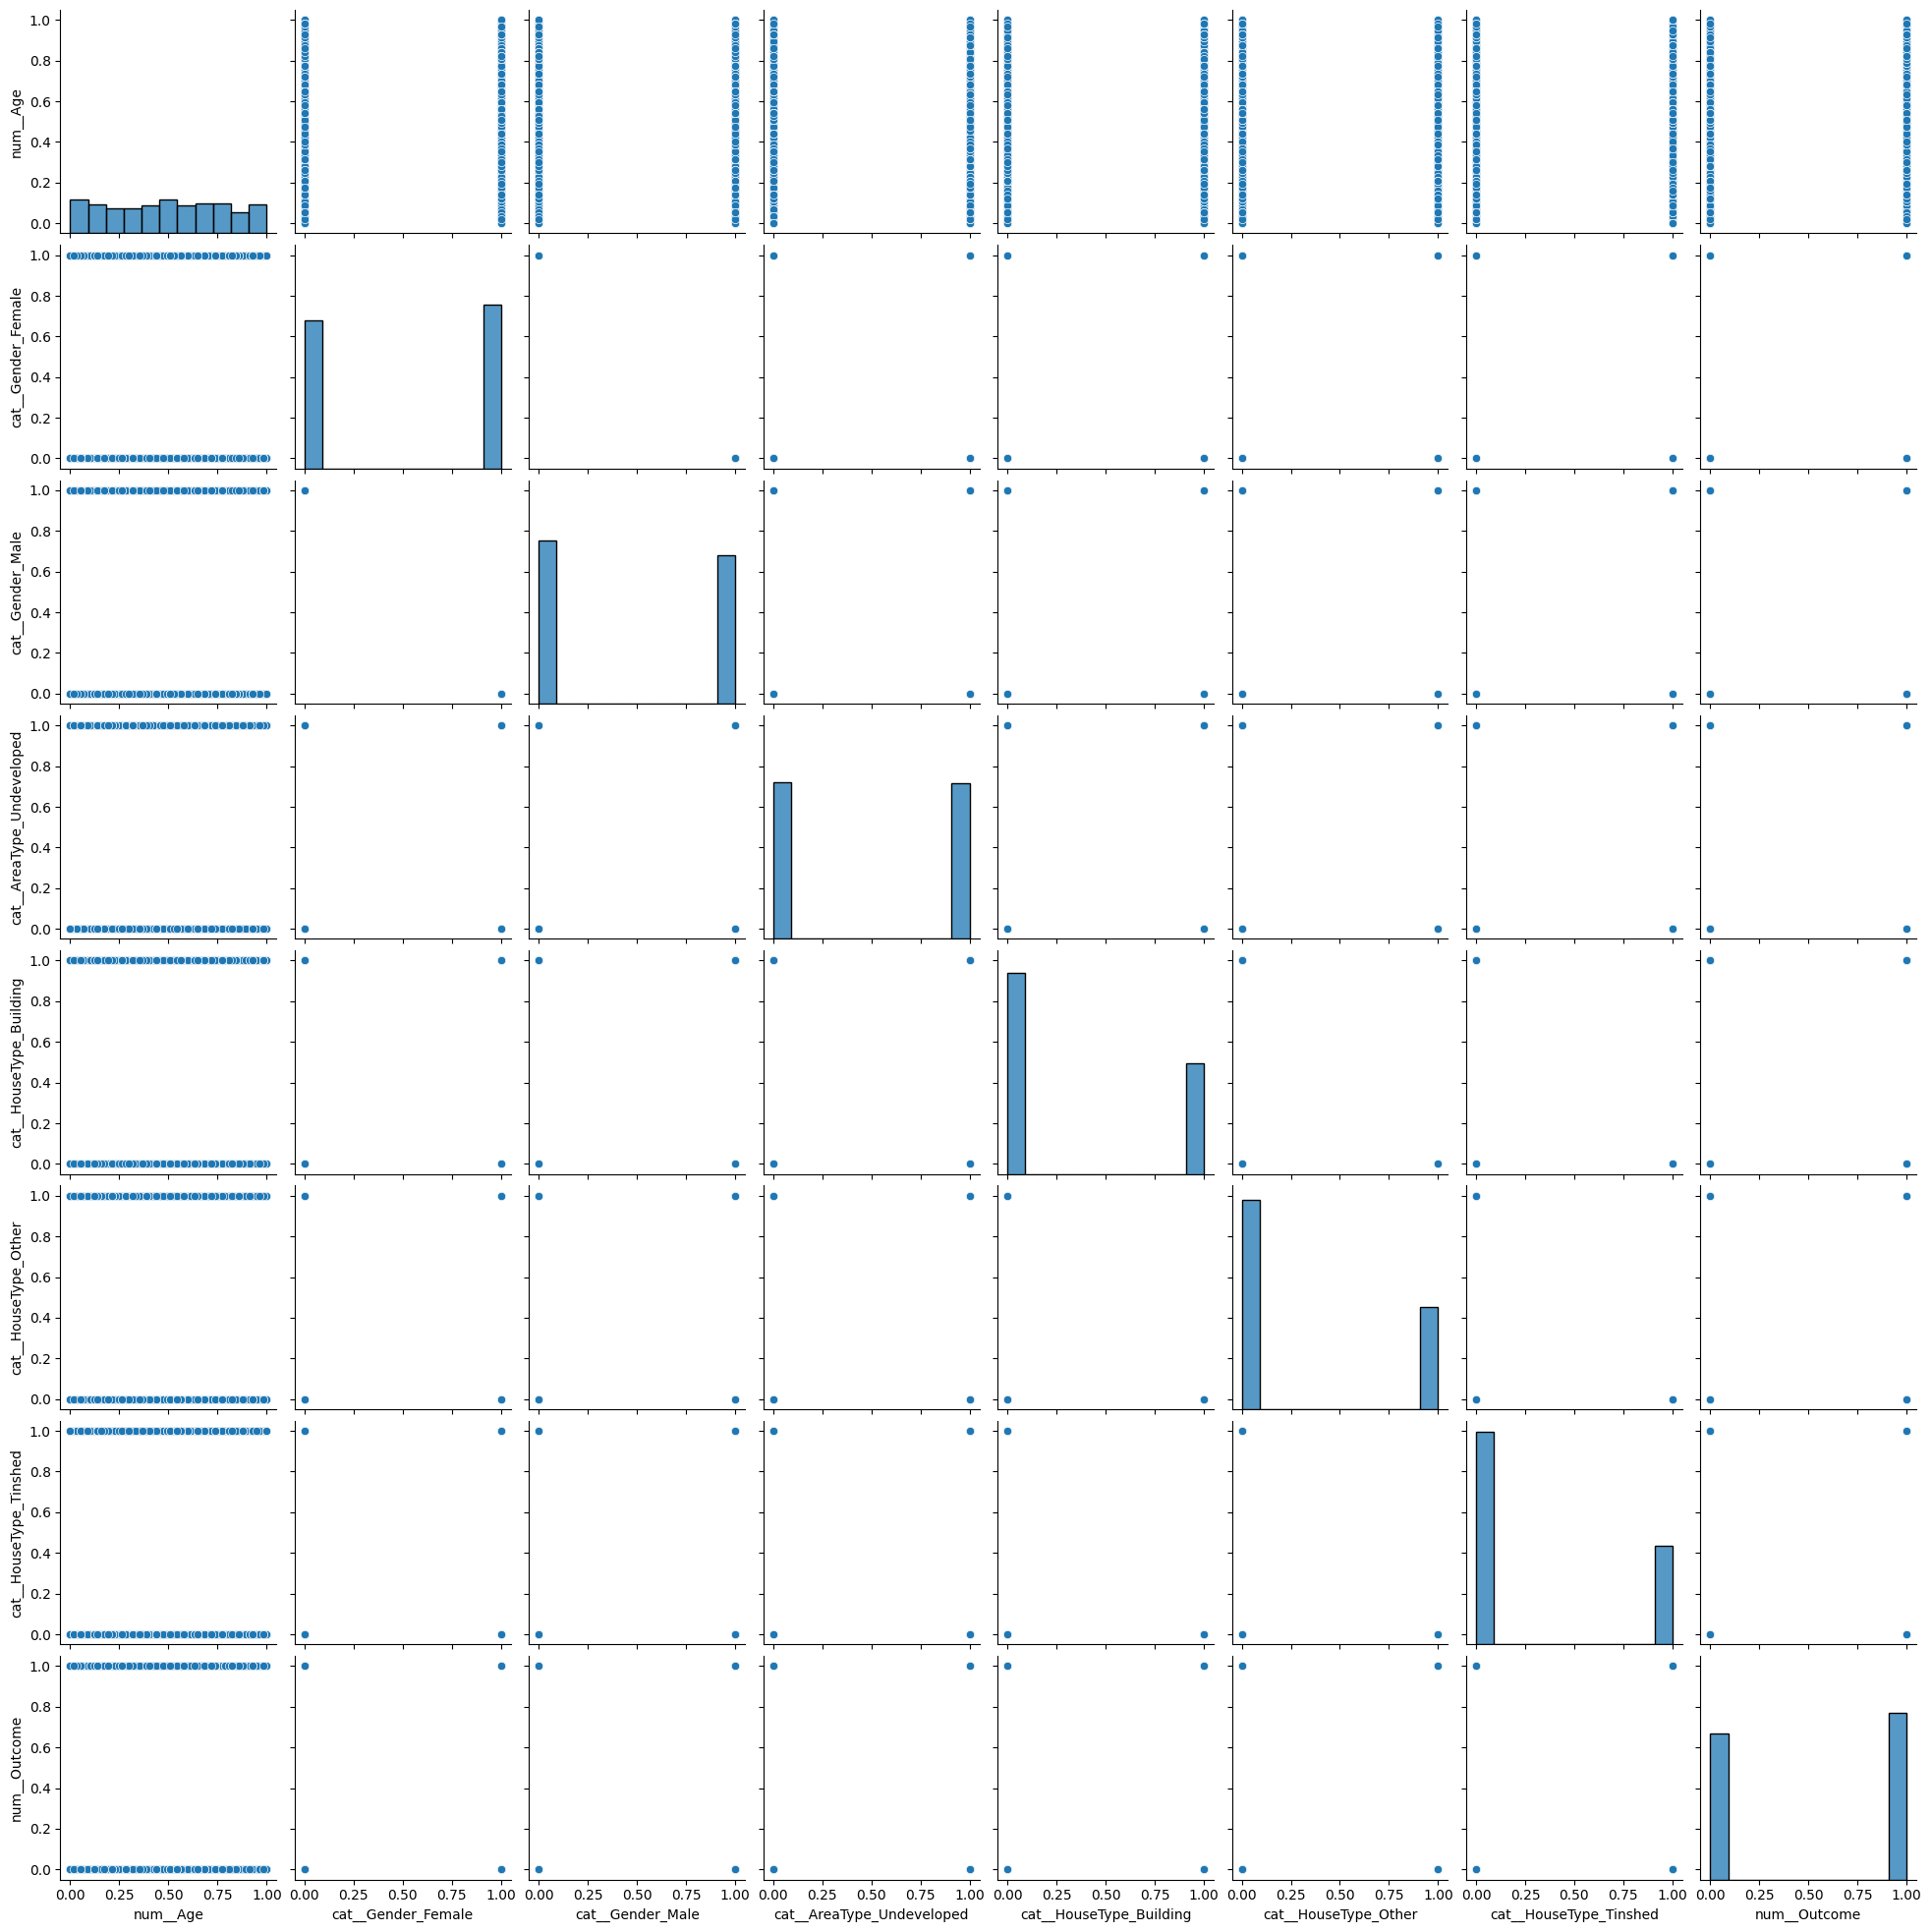

In [ ]:
colunas_selecionadas = ['num__Age',
                        'cat__Gender_Female',
                        'cat__Gender_Male',
                        'cat__AreaType_Undeveloped',
                        'cat__HouseType_Building',
                        'cat__HouseType_Other',
                        'cat__HouseType_Tinshed',
                        'num__Outcome']
dados_selecionados = dados_dengue[colunas_selecionadas]

# Plotando o pairplot
sns.pairplot(dados_selecionados)
plt.show()

# Previsão de caso clinico

In [ ]:
# Função para treinar e avaliar o modelo
def train_and_evaluate(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{model_name} - Acurácia: {acc}")
    print(classification_report(y_test, y_pred))


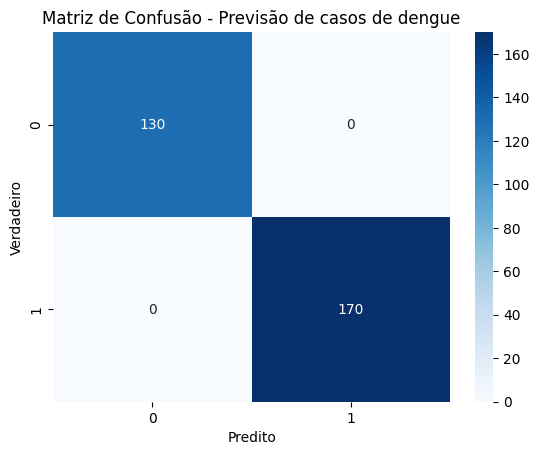

In [ ]:
# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred_tree)
nome = 'Previsão de casos de dengue'

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Matriz de Confusão - {nome}")
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()

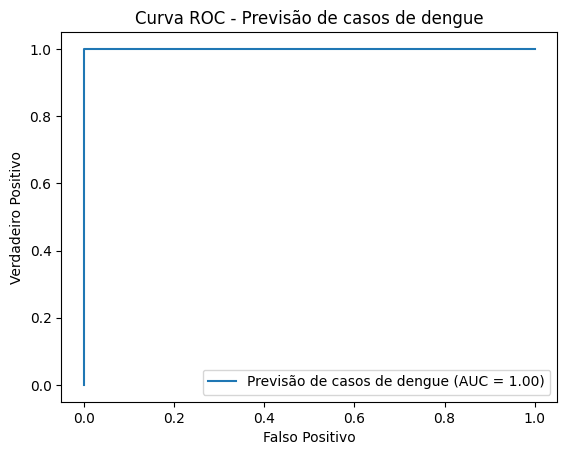

In [ ]:
# Curva ROC
if hasattr(arvore, "predict_proba"):
    y_proba = arvore.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{nome} (AUC = {roc_auc:.2f})')
    plt.xlabel("Falso Positivo")
    plt.ylabel("Verdadeiro Positivo")
    plt.title(f"Curva ROC - {nome}")
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
# Modelos
models = [
    (LogisticRegression(), "Regressão Logística"),
    (SVC(probability=True), "SVM"),
    (RandomForestClassifier(), "Random Forest"),
    (MLPClassifier(max_iter=500), "Rede Neural")
]

for model, name in models:
    train_and_evaluate(model, name)

Regressão Logística - Acurácia: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       130
         1.0       1.00      1.00      1.00       170

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

SVM - Acurácia: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       130
         1.0       1.00      1.00      1.00       170

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Random Forest - Acurácia: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       130
         1.0       1.00      1.00      1.00       170

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.0

#  Classificação da Área de Risco com Base em Resultados Sorológicos





Classificação da área de risco - Acurácia: 0.9933333333333333
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       159
         1.0       1.00      0.99      0.99       141

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



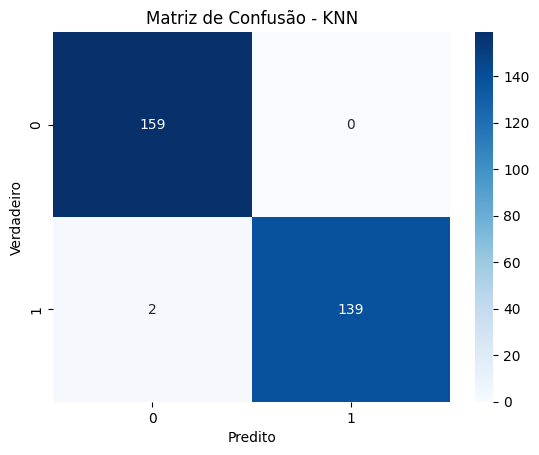

Classificação da área de risco - Acurácia: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       159
         1.0       1.00      1.00      1.00       141

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



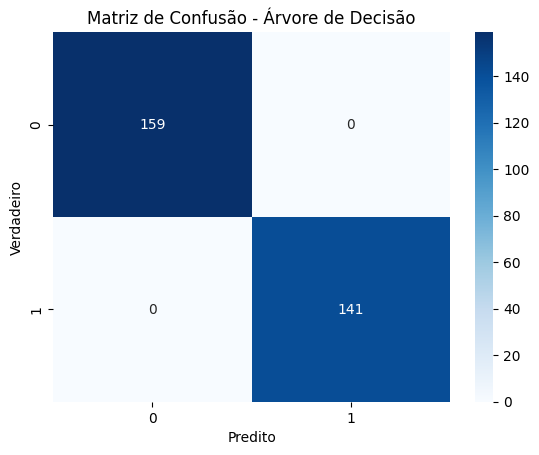

Classificação da área de risco - Acurácia: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       159
         1.0       1.00      1.00      1.00       141

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



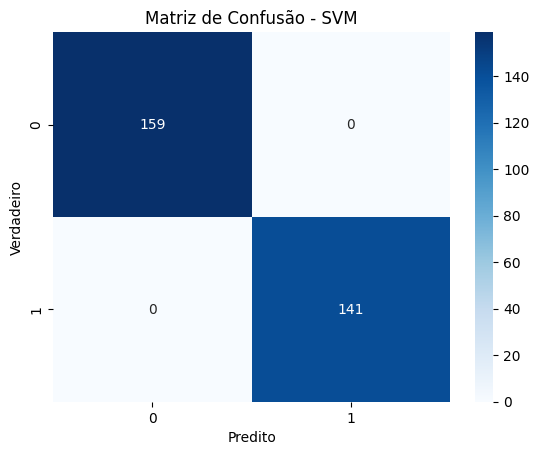

In [ ]:
# X e y
X_area = dados_dengue.drop('cat__AreaType_Undeveloped', axis=1)
y_area = dados_dengue['cat__AreaType_Undeveloped']

# opções 'cat__AreaType_Undeveloped', 'cat__HouseType_Building', 'cat__HouseType_Other', 'cat__HouseType_Tinshed',

# treinamento
X_train, X_test, y_train, y_test = train_test_split(X_area, y_area, test_size=0.3, random_state=42)

nome1 = 'Classificação da área de risco'

def evaluate_area_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{nome1} - Acurácia: {acc}")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Matriz de Confusão - {model_name}")
    plt.xlabel('Predito')
    plt.ylabel('Verdadeiro')
    plt.show()

# Modelos
area_modelo = [
    (KNeighborsClassifier(n_neighbors=5), "KNN"),
    (DecisionTreeClassifier(), "Árvore de Decisão"),
    (SVC(), "SVM")
]


for modelo, nome in area_modelo:
    evaluate_area_model(modelo, nome)

# Probabilidade de infecção

Regressão Logística - Acurácia: 0.99
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       133
         1.0       0.98      1.00      0.99       167

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



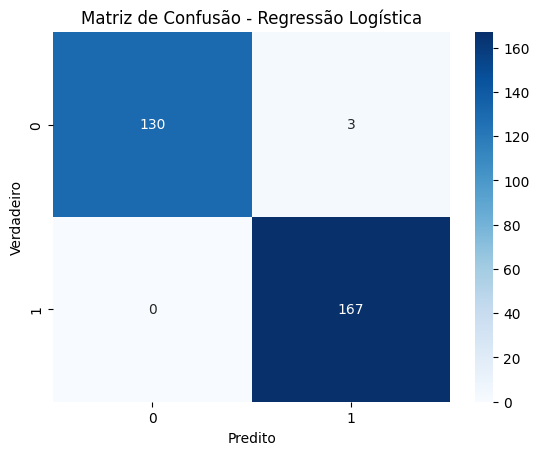

Árvore de Decisão - Acurácia: 0.9766666666666667
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       133
         1.0       0.99      0.97      0.98       167

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



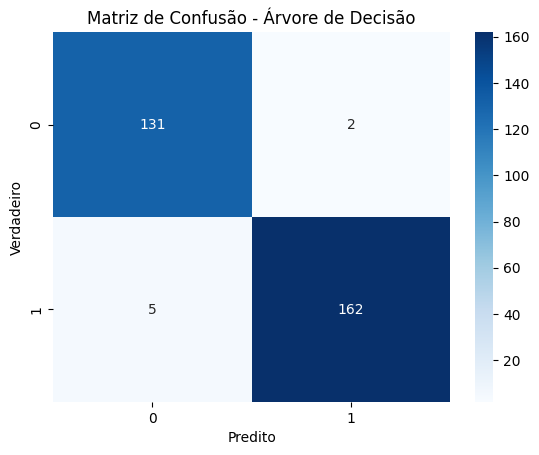

In [ ]:
# X e y
X_infeccao = dados_dengue.drop('num__NS1', axis=1)
y_infeccao = dados_dengue['num__NS1']

# opções 'cat__AreaType_Undeveloped', 'cat__HouseType_Building', 'cat__HouseType_Other', 'cat__HouseType_Tinshed',

# treinamento
X_train, X_test, y_train, y_test = train_test_split(X_infeccao, y_infeccao, test_size=0.3, random_state=42)

nome1 = 'Classificação da área de risco'

def evaluate_area_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{model_name} - Acurácia: {acc}")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Matriz de Confusão - {model_name}")
    plt.xlabel('Predito')
    plt.ylabel('Verdadeiro')
    plt.show()

# Modelos
infeccao = [
    (LogisticRegression(), "Regressão Logística"),
    (DecisionTreeClassifier(), "Árvore de Decisão")
]


for modelo, nome in infeccao:
    evaluate_area_model(modelo, nome)

# Por faixa etária

In [ ]:
# X e y
X_infeccao = dados_dengue.drop('num__NS1', axis=1)
y_infeccao = dados_dengue['num__NS1']

# opções 'cat__AreaType_Undeveloped', 'cat__HouseType_Building', 'cat__HouseType_Other', 'cat__HouseType_Tinshed',

# treinamento
X_train, X_test, y_train, y_test = train_test_split(X_infeccao, y_infeccao, test_size=0.3, random_state=42)

nome1 = 'Classificação da área de risco'

def evaluate_area_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{model_name} - Acurácia: {acc}")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Matriz de Confusão - {model_name}")
    plt.xlabel('Predito')
    plt.ylabel('Verdadeiro')
    plt.show()

# Modelos
infeccao = [
    (LogisticRegression(), "Regressão Logística"),
    (DecisionTreeClassifier(), "Árvore de Decisão")
]


for modelo, nome in infeccao:
    evaluate_area_model(modelo, nome)

In [ ]:
'''dados_dengue['age_group'] = pd.cut(dados_dengue['Age'], bins=[0, 18, 35, 50, 100], labels=['0-18', '19-35', '36-50', '51+'])
y_idade = dados_dengue['age_group']
X_train, X_test, y_train, y_test = train_test_split(X, y_idade, test_size=0.3, random_state=42)
idade_modelo = [
    (LogisticRegression(max_iter=200), "Regressão Logística"),
    (KNeighborsClassifier(n_neighbors=5), "KNN"),
    (DecisionTreeClassifier(), "Árvore de Decisão")
]

for modelo, nome in idade_modelo:
    evaluate_area_model(modelo, nome)'''


In [ ]:
# X e y
X_idade = dados_dengue.drop('num__Age', axis=1)
dados_dengue['age_group'] = pd.cut(dados_dengue['num__Age'], bins=[0, 18, 35, 50, 100], labels=['0-18', '19-35', '36-50', '51+'])
y_idade = dados_dengue['age_group']

label_encoder = LabelEncoder()
y_idade = label_encoder.fit_transform(y_idade)

# treinamento
X_train, X_test, y_train, y_test = train_test_split(X_idade, y_idade, test_size=0.3, random_state=42)

nome1 = 'Classificação da área de risco'

def evaluate_area_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{model_name} - Acurácia: {acc}")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Matriz de Confusão - {model_name}")
    plt.xlabel('Predito')
    plt.ylabel('Verdadeiro')
    plt.show()

# Modelos
infeccao = [
    (LogisticRegression(), "Regressão Logística"),
    (DecisionTreeClassifier(), "Árvore de Decisão")
]


for modelo, nome in infeccao:
    evaluate_area_model(modelo, nome)

ValueError: could not convert string to float: '0-18'